<a href="https://colab.research.google.com/github/parfait2/2022-birthmark/blob/main/%EC%82%B0%ED%95%99%ED%98%91%EB%A0%A5%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_1026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

background rgb :  [255 224 196]
Powell
total_distance_diff: 16.72
x_diff: 0
y_diff: 0
rotation: 0
expand_ratio: 1.00
--------------------------
중심 좌표

time_1_center_list :  [(218, 372), (331, 368), (545, 299), (201, 294), (431, 260), (120, 252), (252, 186), (575, 150), (103, 109), (463, 101), (302, 80)]
time_2_center_list :  [(218, 374), (333, 369), (545, 299), (204, 294), (428, 263), (118, 254), (252, 186), (576, 151), (103, 109), (462, 101), (302, 80)]
time_2_shifted_center_list :  [(218, 374), (333, 369), (545, 299), (204, 294), (428, 263), (118, 254), (252, 186), (576, 151), (103, 109), (462, 101), (302, 80)]
--------------------------
동일한 위치의 점 좌표

index[ 0 ]
기존의 점 좌표(time1) :  [218 372]
현재의 점 좌표(time2) :  [218 374]
기존의 점 색상(time1)   :  [7 2 3]
현재의 점 색상(time2)   :  [0 1 0]


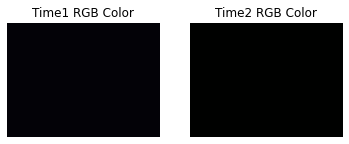

index[ 1 ]
기존의 점 좌표(time1) :  [331 368]
현재의 점 좌표(time2) :  [333 369]
기존의 점 색상(time1)   :  [ 23   9 134]
현재의 점 색상(time2)   :  [ 19   0 132]


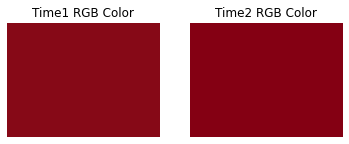

index[ 2 ]
기존의 점 좌표(time1) :  [545 299]
현재의 점 좌표(time2) :  [545 299]
기존의 점 색상(time1)   :  [ 89 120 181]
현재의 점 색상(time2)   :  [ 89 121 180]


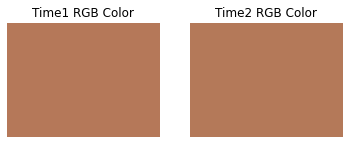

index[ 3 ]
기존의 점 좌표(time1) :  [201 294]
현재의 점 좌표(time2) :  [204 294]
기존의 점 색상(time1)   :  [ 89 120 171]
현재의 점 색상(time2)   :  [ 91 128 188]


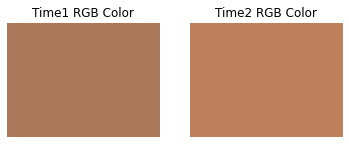

index[ 4 ]
기존의 점 좌표(time1) :  [431 260]
현재의 점 좌표(time2) :  [428 263]
기존의 점 색상(time1)   :  [22 53 84]
현재의 점 색상(time2)   :  [4 3 0]


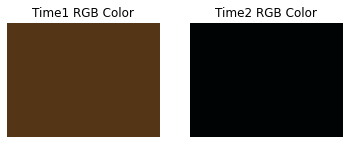

index[ 5 ]
기존의 점 좌표(time1) :  [120 252]
현재의 점 좌표(time2) :  [118 254]
기존의 점 색상(time1)   :  [ 8 49 81]
현재의 점 색상(time2)   :  [4 4 4]


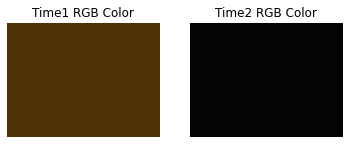

index[ 6 ]
기존의 점 좌표(time1) :  [252 186]
현재의 점 좌표(time2) :  [252 186]
기존의 점 색상(time1)   :  [0 0 1]
현재의 점 색상(time2)   :  [2 0 1]


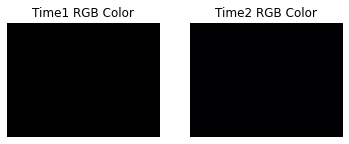

index[ 7 ]
기존의 점 좌표(time1) :  [575 150]
현재의 점 좌표(time2) :  [576 151]
기존의 점 색상(time1)   :  [ 89 124 190]
현재의 점 색상(time2)   :  [ 86 123 183]


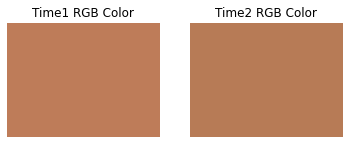

index[ 8 ]
기존의 점 좌표(time1) :  [103 109]
현재의 점 좌표(time2) :  [103 109]
기존의 점 색상(time1)   :  [ 87 123 187]
현재의 점 색상(time2)   :  [ 89 124 187]


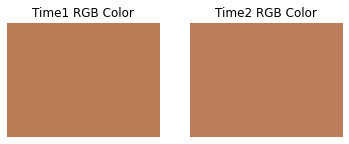

index[ 9 ]
기존의 점 좌표(time1) :  [463 101]
현재의 점 좌표(time2) :  [462 101]
기존의 점 색상(time1)   :  [10  1  0]
현재의 점 색상(time2)   :  [10  0  0]


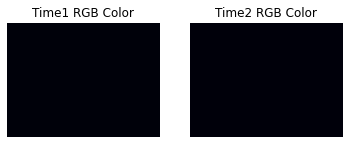

index[ 10 ]
기존의 점 좌표(time1) :  [302  80]
현재의 점 좌표(time2) :  [302  80]
기존의 점 색상(time1)   :  [13 55 84]
현재의 점 색상(time2)   :  [13 55 84]


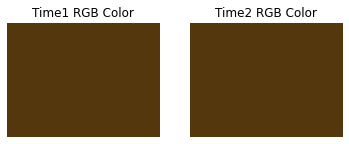

index[ 8 ]
기존의 점 좌표(time1) :  [103 109]
현재의 점 좌표(time2) :  [103 109]
기존의 점 색상(time1)   :  [ 87 123 187]
현재의 점 색상(time2)   :  [ 89 124 187]


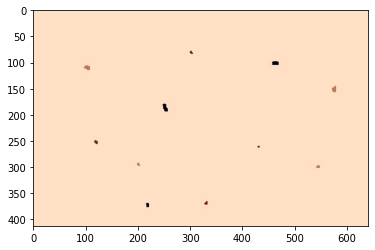

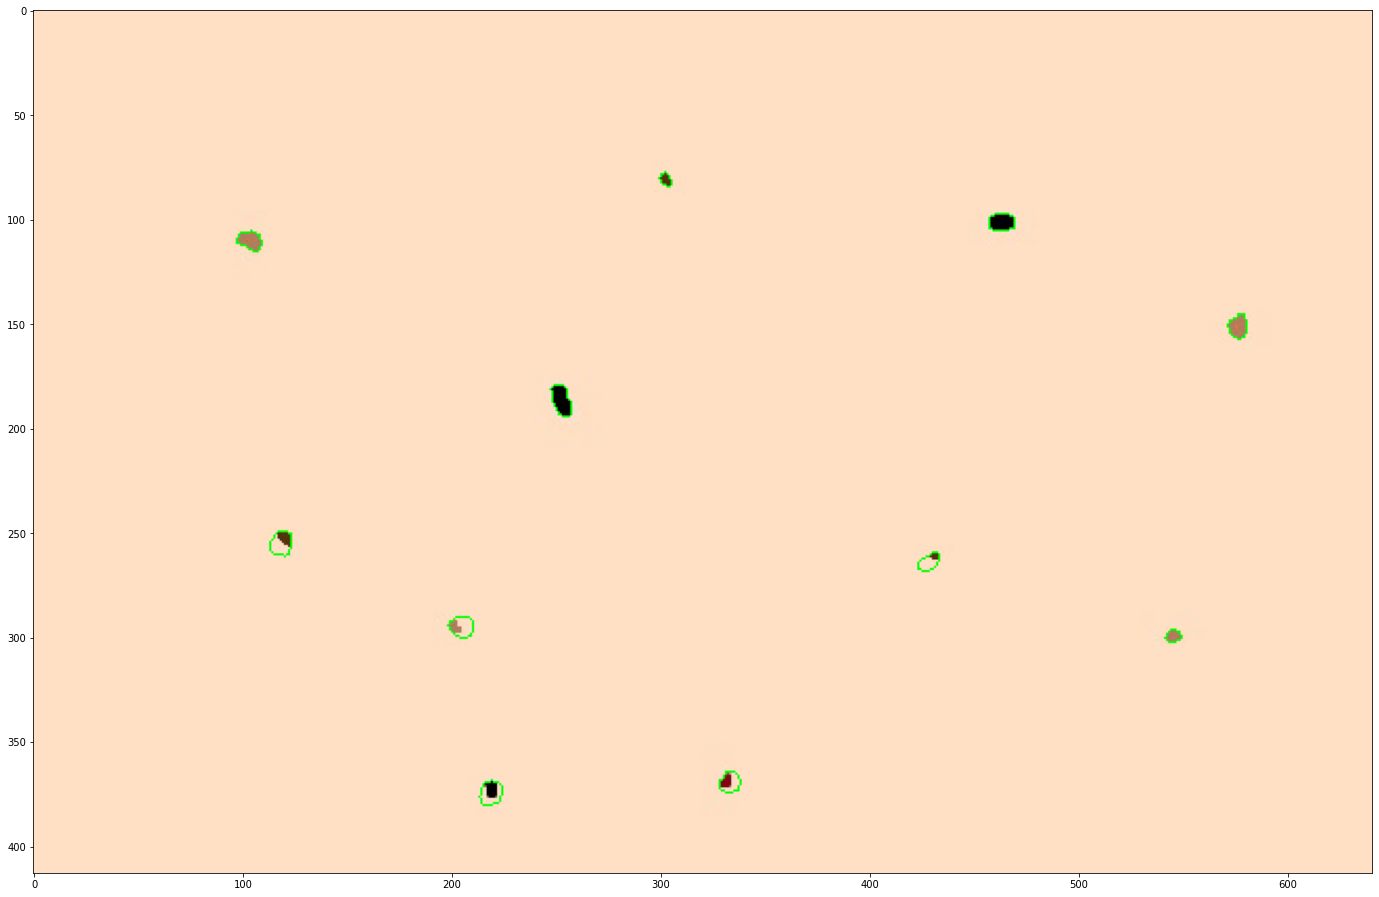

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import sys, random
from PIL import Image

# 이미지 대조 기법 적용.
def img_Contrast(img):
    # -----Converting image to LAB Color model-----------------------------------
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # -----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)

    # -----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))

    cl = clahe.apply(l)

    # -----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl, a, b))

    # -----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return final

# 검출한 컨투어 좌표를 얻는 함수.
def get_contour_list(img):
    img_gray = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    deep = img_Contrast(img_gray)

    blur = cv2.bilateralFilter(deep, 10, 50, 50)
    ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

    edged = cv2.Canny(blur, 200, 240) # 경계선 찾는 함수(모서리 외곽 찾기)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

    contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = []
    for contour in contours:
        x_length, y_length = (np.max(contour, axis=0) - np.min(contour, axis=0))[0]
        if cv2.contourArea(contour) > ((x_length) * (y_length)) / 2:
            filtered_contours.append(contour)

    return filtered_contours

#점(contour)들의 무게중심을 구하는 함수
def get_center_list(contour_list):
    center_list = []
    for contour in contour_list:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"]) #무게중심을 구하는 공식
            cy = int(M["m01"] / M["m00"])
            center_list.append((cx, cy))

    return center_list

# 이미지 받아오기
time_1_file = "KakaoTalk_20220727_123918890_01.jpg"
time_2_file = "KakaoTalk_20220727_123918890.jpg"

time_1_image = cv2.imread(time_1_file)
time_2_image = cv2.imread(time_2_file)
imgRGB = cv2.cvtColor(time_2_image, cv2.COLOR_BGR2RGB)
time_2_image_center = np.array(time_2_image.shape[1::-1]) / 2

time_1_contour_list = get_contour_list(time_1_image)
time_2_contour_list = get_contour_list(time_2_image)

time_1_center_list = get_center_list(time_1_contour_list)
time_2_center_list = get_center_list(time_2_contour_list)

print("background rgb : ", imgRGB[0][0])

def rotate_points(points, center_loc, degree):
    rad = np.radians(degree)
    c, s = np.cos(rad), np.sin(rad)
    rotate_matrix = np.array(((c, -s), (s, c)))
    rotated_points = (points - np.array(center_loc)).dot(rotate_matrix) + center_loc

    return rotated_points

def calculate_distance(org_loc_list, new_loc_list):
    total_dist = 0
    for idx, loc in enumerate(np.array(org_loc_list)):
        # 가장 가까운 점과의 거리 계산
        smallest_dist = sys.maxsize

        for target_loc in np.array(new_loc_list):
            dist = np.linalg.norm(target_loc - loc)
            if dist < smallest_dist:
                smallest_dist = dist

        total_dist += smallest_dist

    return total_dist

def f(params, center_list_1, center_list_2, time_2_image_center):
    x_diff, y_diff, degree, expand_ratio = params

    center_list_1 = np.array(center_list_1)
    center_list_2 = np.array(center_list_2)

    modified_center_list = np.array(center_list_2)
    # 회전
    modified_center_list = rotate_points(modified_center_list, time_2_image_center, degree)
    # 확대, 축소
    modified_center_list = modified_center_list * expand_ratio
    # X, Y 오프셋
    modified_center_list = modified_center_list + [x_diff, y_diff]

    # 거리 계산
    distance = calculate_distance(center_list_1, modified_center_list)
    #print("distance : ", distance)
    return distance

# 'Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP', 'trust-constr'
# 어느 정도 좋은 성능을 보인 method - Powell, trust-constr
for method in ['Powell']:
    print(method)
    result = scipy.optimize.minimize(f, [0, 0, 0, 1], method=method, args=(time_1_center_list, time_2_center_list, time_2_image_center))

    print("total_distance_diff:", f"{result.fun:0.2f}")

    x_diff, y_diff, degree, expand_ratio = result.x
    print("x_diff:", int(x_diff))
    print("y_diff:", int(y_diff))
    print("rotation:", int(degree))
    print("expand_ratio:", f"{expand_ratio:0.2f}")

def rotate_image(image, image_center, degree):
    rot_mat = cv2.getRotationMatrix2D(image_center, degree, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)

    return result

def resize_image(image, expand_ratio):
    h, w = image.shape[:2]
    resized_image = cv2.resize(image, None, fx=expand_ratio, fy=expand_ratio)
    resized_h, resized_w = resized_image.shape[:2]

    result = np.zeros((h, w, 3), np.uint8)
    result[0:resized_h, 0:resized_w] = resized_image[0:h, 0:w]

    return result

def shift_image(image, x_shift, y_shift):
    h, w = image.shape[:2]
    shift_mat = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    result = cv2.warpAffine(image, shift_mat, (w, h))

    return result

rotated_image = rotate_image(time_2_image, time_2_image_center, degree)
resized_image = resize_image(rotated_image, expand_ratio)
shifted_image = shift_image(resized_image, x_diff, y_diff)

time_2_shifted_contour_list = get_contour_list(shifted_image)
time_2_shifted_center_list = get_center_list(time_2_shifted_contour_list)

print('--------------------------')
print('중심 좌표\n')
print("time_1_center_list : ", time_1_center_list)
print("time_2_center_list : ", time_2_center_list)
print("time_2_shifted_center_list : ", time_2_shifted_center_list)

time_1_center_list = np.array(time_1_center_list)
time_2_shifted_center_list = np.array(time_2_shifted_center_list)

def find_nearest_vector(array, value):
  idx = np.array([np.linalg.norm(x+y) for (x,y) in array-value]).argmin()
  return array[idx]

print('--------------------------')
print('동일한 위치의 점 좌표\n')

# 벡터 배열에서 가장 가까운 벡터 찾기
for i in range(len(time_2_shifted_center_list)) :
  res = find_nearest_vector(time_1_center_list, time_2_shifted_center_list[i])
  dist = np.linalg.norm(res-time_2_shifted_center_list[i])
  # print('distance(index[', i, ']) : ', dist)

  if dist < 10 :
    print('index[',i, ']')
    print('기존의 점 좌표(time1) : ', res)
    print('현재의 점 좌표(time2) : ', time_2_shifted_center_list[i])

    print('기존의 점 색상(time1) ', " : ", time_1_image[time_1_center_list[i][1]][time_1_center_list[i][0]]) # BGR
    print('현재의 점 색상(time2) ', " : ", shifted_image[time_2_shifted_center_list[i][1]][time_2_shifted_center_list[i][0]]) # BGR

    color_img1 = np.full((480,640,3), (time_1_image[time_1_center_list[i][1]][time_1_center_list[i][0]]), dtype=np.uint8)
    color_img2 = np.full((480,640,3), (shifted_image[time_2_shifted_center_list[i][1]][time_2_shifted_center_list[i][0]]), dtype=np.uint8)

    fig = plt.figure()
    rows = 1
    cols = 2

    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(cv2.cvtColor(color_img1, cv2.COLOR_BGR2RGB))
    ax1.set_title('Time1 RGB Color')
    ax1.axis("off")

    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(cv2.cvtColor(color_img2, cv2.COLOR_BGR2RGB))
    ax2.set_title('Time2 RGB Color')
    ax2.axis("off")

    plt.show()


# 예시 : index[8] 출력
print('index[',8, ']')

res = find_nearest_vector(time_1_center_list, time_2_shifted_center_list[8])
dist = np.linalg.norm(res-time_2_shifted_center_list[8])


print('기존의 점 좌표(time1) : ', res)
print('현재의 점 좌표(time2) : ', time_2_shifted_center_list[8])

print('기존의 점 색상(time1) ', " : ", time_1_image[time_1_center_list[8][1]][time_1_center_list[8][0]]) # BGR
print('현재의 점 색상(time2) ', " : ", shifted_image[time_2_shifted_center_list[8][1]][time_2_shifted_center_list[8][0]]) # BGR



plt.imshow(cv2.cvtColor(shifted_image, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(time_1_image, cv2.COLOR_BGR2RGB))

def rotate_contours(contours, center_loc, degree):
    rad = np.radians(degree)
    c, s = np.cos(rad), np.sin(rad)
    rotate_matrix = np.array(((c, -s), (s, c)))
    rotated_points = np.array([(contour - np.array(center_loc)).dot(rotate_matrix) + center_loc for contour in contours], dtype=object)

    return rotated_points

def transform_contours(contour_list, center_loc, x_diff, y_diff, degree, expand_ratio):
    # 회전
    modified_contour_list = rotate_contours(contour_list, center_loc, degree)
    # 확대, 축소
    modified_contour_list = modified_contour_list * expand_ratio
    # X, Y 오프셋
    modified_contour_list = [contour + [x_diff, y_diff] for contour in modified_contour_list]
    # int로 변환
    modified_contour_list = [contour.astype(int) for contour in modified_contour_list]

    return modified_contour_list

transformed_contour_list = transform_contours(time_2_contour_list, time_2_image_center, x_diff, y_diff, degree, expand_ratio)

plt.figure(figsize=(24, 24))
contours_img = cv2.drawContours(time_1_image, transformed_contour_list, -1, (0, 255, 0), 1)
plt.imshow(cv2.cvtColor(contours_img, cv2.COLOR_BGR2RGB))

메모
getSpatialMoments
외곽선의 유사도 비교
cvContourMoments

notion에 내용 추가
https://datascienceschool.net/03%20machine%20learning/03.02.03%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%BB%A8%ED%88%AC%EC%96%B4.html
image moment : contour에 대한 특징값
